In [1]:
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import propose_method as pm
import seaborn as sns
from make_dataset import create_separate_dataset
from scipy import interpolate

sns.set_context("poster")
from sklearn.cluster import KMeans
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
)
from sklearn.svm import SVC, OneClassSVM

np.seterr(all="ignore")

SyntaxError: invalid syntax (make_dataset.py, line 81)

In [5]:
%conda install -c conda-forge imbalanced-learn

/ 
Note: you may need to restart the kernel to use updated packages.


In [2]:
region_bounds = [[1.4, 2.8, 3.9], [0.5, 2.3, 2.7], [1.1, 1.7, 3.8]]
for bound in region_bounds:
    X, y = create_separate_dataset(
        n_samples=50, region_bound=bound, decreased_sample=5, hold_samples=True
    )
    Ma_index = np.where(y != 0)

    print(Ma_index)
    Ma = np.array([X[i] for i in Ma_index]).ravel()
    print(len(Ma))
    print(Counter(y))
    plt.figure(figsize=(12, 4))
    plt.ylim((-0.5, 0.5))
    plt.xlim((0,5))
    plt.vlines(x=bound[0], ymin=-1, ymax=5)
    plt.vlines(x=bound[1], ymin=-1, ymax=5)
    plt.vlines(x=bound[2], ymin=-1, ymax=5)
    #plt.hlines(y=bound[0],xmin=0,xmax=5)
    #plt.hlines(y=bound[1],xmin=0,xmax=5)
    #plt.hlines(y=bound[2],xmin=0,xmax=5)

    plt.scatter(X, np.zeros(len(X)), alpha=0.8, c=y, edgecolor="k")

NameError: name 'create_separate_dataset' is not defined

/home/torainu256/miniconda2/envs/Kotaro_method/lib/python3.10/site-packages/scipy/interpolate/rbf.py:266: LinAlgWarning: Ill-conditioned matrix (rcond=2.22545e-18): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)
/home/torainu256/miniconda2/envs/Kotaro_method/lib/python3.10/site-packages/scipy/interpolate/rbf.py:266: LinAlgWarning: Ill-conditioned matrix (rcond=7.55183e-19): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)
/home/torainu256/miniconda2/envs/Kotaro_method/lib/python3.10/site-packages/scipy/interpolate/rbf.py:266: LinAlgWarning: Ill-conditioned matrix (rcond=4.40318e-17): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)
/home/torainu256/miniconda2/envs/Kotaro_method/lib/python3.10/site-packages/scipy/interpolate/rbf.py:266: LinAlgWarning: Ill-conditioned matrix (rcond=3.83944e-17): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)
/home/torainu256/miniconda2/envs/Kotaro_method/l

1


/home/torainu256/miniconda2/envs/Kotaro_method/lib/python3.10/site-packages/scipy/interpolate/rbf.py:266: LinAlgWarning: Ill-conditioned matrix (rcond=4.78834e-18): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)
/home/torainu256/miniconda2/envs/Kotaro_method/lib/python3.10/site-packages/scipy/interpolate/rbf.py:266: LinAlgWarning: Ill-conditioned matrix (rcond=8.95136e-17): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)
/home/torainu256/miniconda2/envs/Kotaro_method/lib/python3.10/site-packages/scipy/interpolate/rbf.py:266: LinAlgWarning: Ill-conditioned matrix (rcond=4.1936e-17): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)
/home/torainu256/miniconda2/envs/Kotaro_method/lib/python3.10/site-packages/scipy/interpolate/rbf.py:266: LinAlgWarning: Ill-conditioned matrix (rcond=6.2244e-18): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)
/home/torainu256/miniconda2/envs/Kotaro_method/lib

2


/home/torainu256/miniconda2/envs/Kotaro_method/lib/python3.10/site-packages/scipy/interpolate/rbf.py:266: LinAlgWarning: Ill-conditioned matrix (rcond=1.16581e-18): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)
/home/torainu256/miniconda2/envs/Kotaro_method/lib/python3.10/site-packages/scipy/interpolate/rbf.py:266: LinAlgWarning: Ill-conditioned matrix (rcond=7.85197e-19): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)
/home/torainu256/miniconda2/envs/Kotaro_method/lib/python3.10/site-packages/scipy/interpolate/rbf.py:266: LinAlgWarning: Ill-conditioned matrix (rcond=2.05507e-18): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)
/home/torainu256/miniconda2/envs/Kotaro_method/lib/python3.10/site-packages/scipy/interpolate/rbf.py:266: LinAlgWarning: Ill-conditioned matrix (rcond=3.30349e-18): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)
/home/torainu256/miniconda2/envs/Kotaro_method/l

3


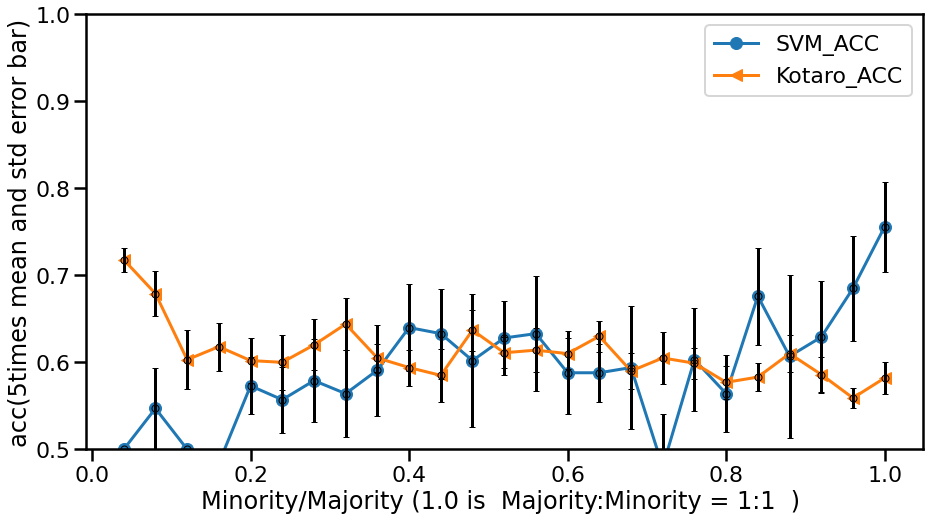

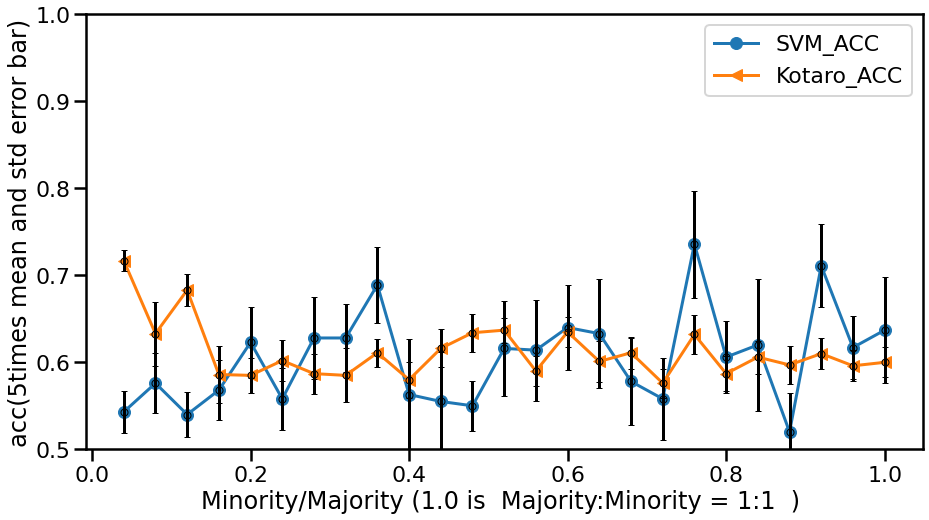

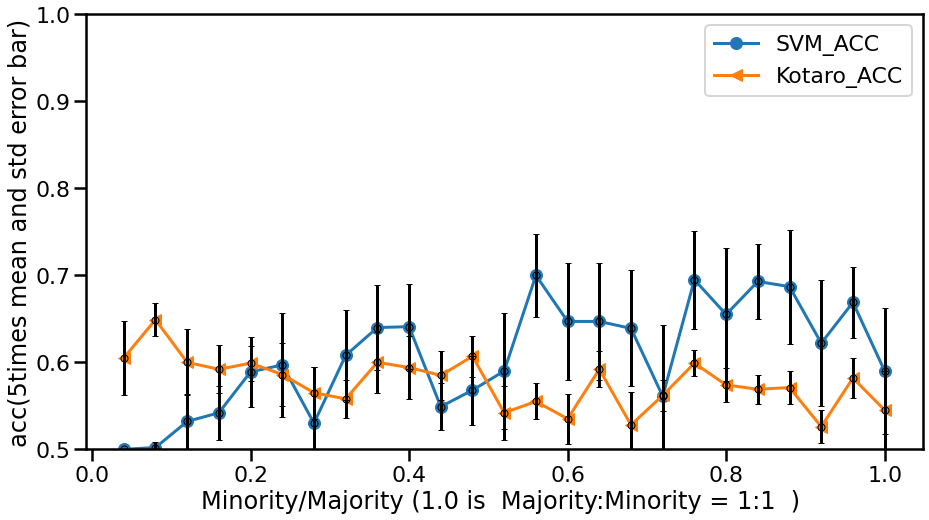

In [23]:
x = np.linspace(0, 5, num=100)


def step_fun3(region_bound, X):
    return (
        (-1 * (X > region_bound[0] + 0.07))
        + (1 * (X > region_bound[1] + 0.1))
        + (-1 * (X > region_bound[2] + 0.08))
    )


region_bound = [1.4, 2.8, 3.9]
region_bounds = [[1.4, 2.8, 3.9], [0.5, 2.3, 2.7], [1.1, 1.7, 3.8]]
title_n = 1

for bound in region_bounds:

    SVM_means = []
    SVM_stds = []
    Kotaro_means = []
    Kotaro_stds = []
    for erase_number in range(0, 49, 2):
        accs1 = []
        accs2 = []
        for i in range(0, 10):
            X, y = create_separate_dataset(
                n_samples=100,
                random_state=i,
                region_bound=bound,
                decreased_sample=erase_number,
            )
            X_t, y_t = create_separate_dataset(
                n_samples=100, random_state=i, region_bound=bound
            )
            # if  not np.any(y==1):
            #   while not np.any(y==1):
            #       X,y = create_separate_dataset(n_samples=100,region_bound=bound,decreased_sample=erase_number)
            Ma_index = np.where(y == 1)
            Ma = np.array([X[i] for i in Ma_index]).ravel()
            len(Ma)
            yi = np.ones(len(Ma))
            # rbf = interpolate.Rbf(Ma,yi,function='gaussian')
            rbf = interpolate.Rbf(Ma, yi, function="gaussian")

            z = rbf(X_t).reshape(100,) + (step_fun3(bound, X_t)).reshape(100,)
            # kmeans = KMeans(n_clusters=2)
            # distance = kmeans.fit_transform(np.array(Ma).reshape((-1,1)))
            # labels = kmeans.labels_
            # cluster_center = kmeans.cluster_centers_
            # print("距離:",distance)
            # print(Counter(labels))
            
            # print("erase:n",erase_number)
            model = SVC(kernel="rbf", C=1000, gamma=0.001)
            model.fit(X, y)

            pred1 = model.predict(X_t)

            # z =model.decision_function(X_t) + (step_fun3(bound,X_t)).ravel()
            z = rbf(X_t).reshape(100,) + (step_fun3(bound, X_t)).reshape(100,)

            pred2 = np.sign(z)
            # print(pred2)
            pred2 = np.where(pred2 == 1, 0, 1)
            acc1 = accuracy_score(y_t, pred1)
            accs1.append(acc1)
            acc2 = accuracy_score(y_t, pred2)
            accs2.append(acc2)
            # print("SVM acc:",acc1,"Kotaro acc:", acc2)
        accs1 = np.array(accs1)
        accs2 = np.array(accs2)

        svm_mean = accs1.mean() 
        svm_sd = accs1.std(ddof=1) / np.sqrt(len(accs1))
        # print(svm_mean,svm_sd)
        kotaro_mean = accs2.mean() - 0.2
        kotaro_std = accs2.std(ddof=1) / np.sqrt(len(accs2))
        SVM_means.append(svm_mean)
        SVM_stds.append(svm_sd)
        Kotaro_means.append(kotaro_mean)
        Kotaro_stds.append(kotaro_std)
    # print("SVM means", SVM_means)
    print(title_n)
    plt.figure(figsize=(15, 8))
    # print("SMV_means",SVM_means)
    ratio = (50 - np.array(range(0, 49, 2))) / 50
    plt.ylim((0.5, 1.0))
    plt.plot(ratio, SVM_means, marker="o", label="SVM_ACC")
    plt.plot(ratio, Kotaro_means, marker="<", label="Kotaro_ACC")
    plt.errorbar(
        ratio,
        SVM_means,
        yerr=SVM_stds,
        capsize=3,
        ecolor="k",
        fmt="o",
        ms=7,
        mfc="None",
        mec="k",
    )
    plt.errorbar(
        ratio,
        Kotaro_means,
        yerr=Kotaro_stds,
        capsize=3,
        ecolor="k",
        fmt="o",
        ms=7,
        mfc="None",
        mec="k",
    )
    plt.xlabel("Minority/Majority (1.0 is  Majority:Minority = 1:1  ) ")
    plt.ylabel("acc(5times mean and std error bar)")
    plt.legend()
    plt.savefig("only_SVM" + str(title_n) + ".png")
    title_n += 1

Counter({0: 25, 1: 25})
Counter({0: 25, 1: 25})
Counter({0: 25, 1: 25})


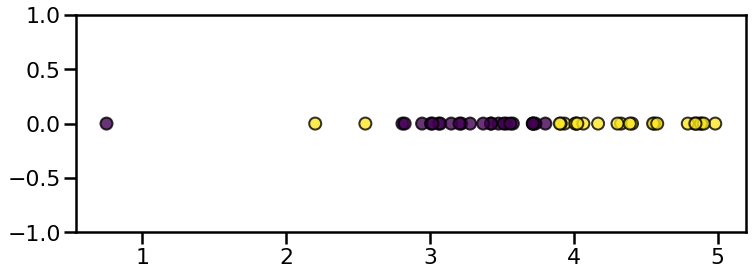

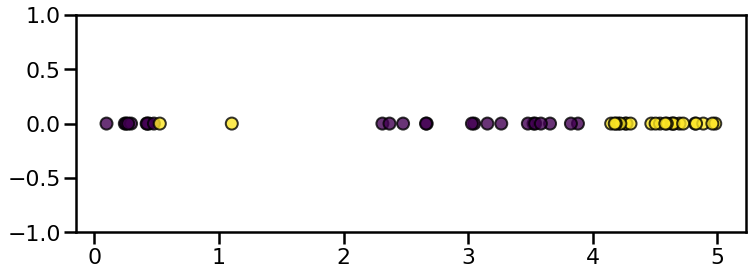

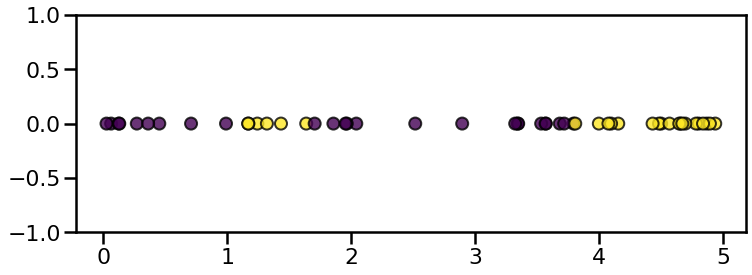

In [8]:
region_bounds = [[1.4, 2.8, 3.9], [0.5, 2.3, 4.1], [1.1, 1.7, 3.8]]
best_params = []
for bound in region_bounds:
    X, y = create_separate_dataset(n_samples=50, region_bound=bound, decreased_sample=0)
    print(Counter(y))
    plt.figure(figsize=(12, 4))
    plt.ylim((-1, 1))
    plt.scatter(X, np.zeros(len(X)), alpha=0.8, c=y, edgecolor="k")

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("poster")
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

x = np.linspace(0, 5, num=100)


def step_fun3(region_bound, X):
    return (
        (1.5 * (X > region_bound[0] + 0.07))
        + (-1.5 * (X > region_bound[1] + 0.1))
        + (1.5 * (X > region_bound[2] + 0.08))
    )


region_bound = [1.4, 2.8, 3.9]
region_bounds = [[1.4, 2.8, 3.9], [0.5, 2.3, 2.7], [1.1, 1.7, 3.8]]
best_params = []
gamma = [i for i in np.arange(0.5, 1.0, 0.1)] + [i for i in np.arange(1.5, 20, 0.5)]


SVM_means = []
SVM_stds = []
for bound in region_bounds:

    # Kotaro_means = []
    # Kotaro_stds = []
    best_param = []
    for erase_number in range(0, 49, 2):
        accs1 = []
        accs2 = []

        X, y = create_separate_dataset(
            n_samples=100,
            random_state=i,
            region_bound=bound,
            decreased_sample=erase_number,
        hold_samples=True,
        )
        # if  not np.any(y==1):
        #   while not np.any(y==1):
        #       X,y = create_separate_dataset(n_samples=100,region_bound=bound,decreased_sample=erase_number)

        X_t, y_t = create_separate_dataset(
            n_samples=100, random_state=i, region_bound=bound
        )
        tuned_parameters = [
            {"C": [1, 10, 100, 1000], "kernel": ["rbf"], "gamma": gamma},
        ]

        score = "f1"
        clf = GridSearchCV(
            SVC(),  # 識別器
            tuned_parameters,  # 最適化したいパラメータセット
            cv=5,  # 交差検定の回数
            scoring="%s_weighted" % score,
        )
        clf.fit(X, y)
        y_pred = clf.predict(X_t)
        #print("erase_n:", erase_number, clf.best_params_)
        best_param.append(clf.best_params_)
    best_params.append(best_param)

/home/torainu256/miniconda2/envs/Kotaro_method/lib/python3.10/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/home/torainu256/miniconda2/envs/Kotaro_method/lib/python3.10/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/home/torainu256/miniconda2/envs/Kotaro_method/lib/python3.10/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/home/torainu256/miniconda2/envs/Kotaro_method/lib/python3.10/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/home/torainu256/miniconda2/envs/Kotaro_method/lib/python3.10/site-packages/sklearn/model_se

/home/torainu256/miniconda2/envs/Kotaro_method/lib/python3.10/site-packages/scipy/interpolate/rbf.py:266: LinAlgWarning: Ill-conditioned matrix (rcond=1.09422e-17): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)
/home/torainu256/miniconda2/envs/Kotaro_method/lib/python3.10/site-packages/scipy/interpolate/rbf.py:266: LinAlgWarning: Ill-conditioned matrix (rcond=1.23688e-17): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)
/home/torainu256/miniconda2/envs/Kotaro_method/lib/python3.10/site-packages/scipy/interpolate/rbf.py:266: LinAlgWarning: Ill-conditioned matrix (rcond=6.76256e-18): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)
/home/torainu256/miniconda2/envs/Kotaro_method/lib/python3.10/site-packages/scipy/interpolate/rbf.py:266: LinAlgWarning: Ill-conditioned matrix (rcond=2.9229e-17): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)
/home/torainu256/miniconda2/envs/Kotaro_method/li

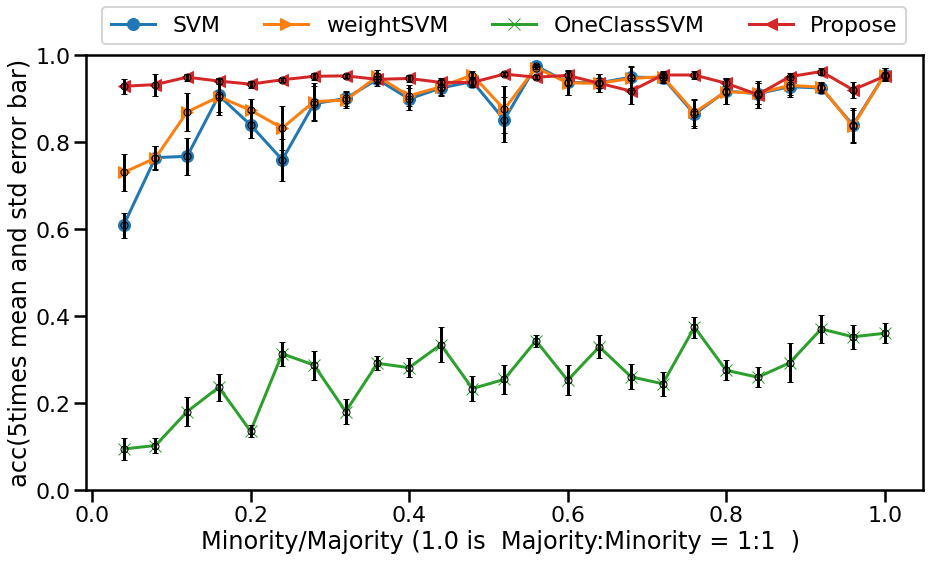

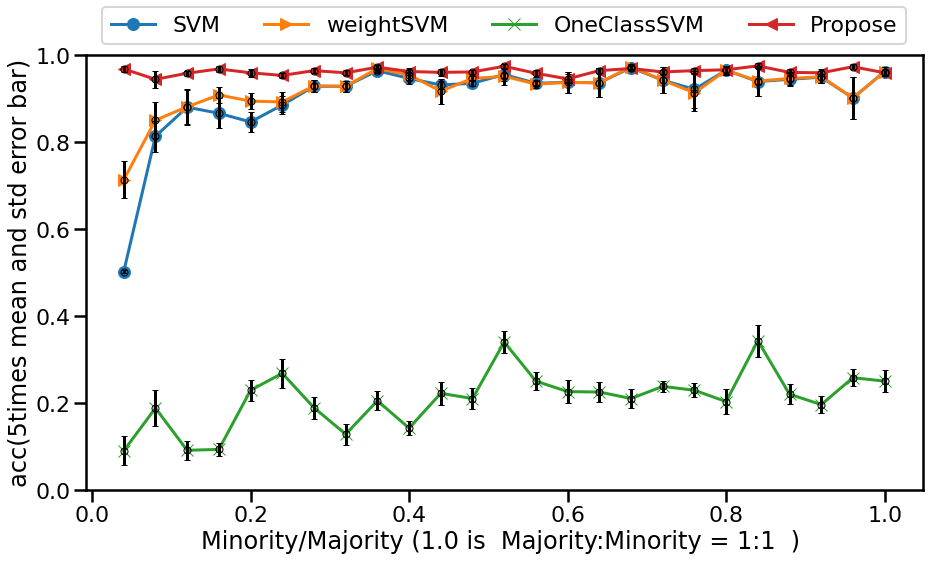

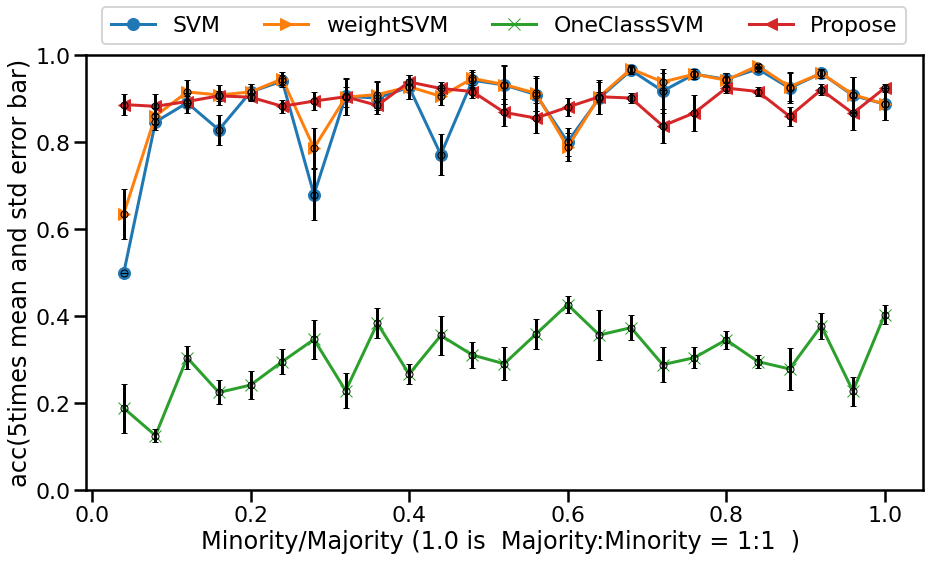

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("poster")
x = np.linspace(0, 5, num=100)


def step_fun3(region_bound, X):
    return (
        (-1.1 * (X > region_bound[0] + 0.07))
        + (1.1* (X > region_bound[1] - 0.1))
        + (-1.1 * (X > region_bound[2] + 0.08))
    )


region_bound = [1.4, 2.8, 3.9]
region_bounds = [[1.4, 2.8, 3.9], [0.5, 2.3, 2.7], [1.1, 1.7, 3.8]]
# for bound in region_bounds:
#           X, y = create_separate_dataset(n_samples=50,region_bound=bound,decreased_sample=20)
#            print(Counter(y))
#            plt.figure(figsize=(20,8))
#            plt.ylim((-4,4))
#            plt.scatter(X, np.zeros(len(X)), alpha=0.8,c=y, edgecolor="k")


for (bound, params) in zip(region_bounds, best_params):

    SVM_means = []
    SVM_stds = []
    weightSVM_means = []
    weightSVM_stds = []
    OneClassSVM_means = []
    OneClassSVM_stds = []
    smoteSVM_means = []
    smoteSVM_stds = []
    Kotaro_means = []
    Kotaro_stds = []

    for (erase_number, param) in zip(range(0, 49, 2), params):
        accs_SVM = []
        accs_weightSVM = []
        accs_OneClassSVM = []
        smote_SVM = []
        accs_Kotaro = []
        # C, gamma, kernel, degree = 0
        if param["kernel"] == "rbf" or param["kernel"] == "sigmoid":
            C = param["C"]
            gamma = param["gamma"]
            kernel = param["kernel"]
        elif param["kernel"] == "linear":
            C = param["C"]
            kernel = param["kernel"]
        else:
            C = param["C"]
            gamma = param["gamma"]
            degree = param["degree"]
            kernel = param["kernel"]
        for i in range(0, 10):
            X, y = create_separate_dataset(
                n_samples=100,
                random_state=i,
                region_bound=bound,
                decreased_sample=erase_number,
                hold_samples=False,
            )

            X_t, y_t = create_separate_dataset(
                n_samples=100, random_state=i, region_bound=bound
            )

            if kernel == "poly":
                model = SVC(kernel=kernel, C=C, gamma=gamma, degree=degree)
                model.fit(X, y)
            else:
                model = SVC(kernel=kernel, C=C, gamma=gamma)
                model.fit(X, y)
                weight_model = SVC(
                    kernel=kernel, C=C, gamma=gamma, class_weight="balanced"
                )
                weight_model.fit(X, y)
                one_class_model = OneClassSVM(kernel=kernel, gamma=gamma,nu=0.1)
                one_class_model.fit(X, y)

            pred_SVM = model.predict(X_t)
            pred_weightSVM = weight_model.predict(X_t)
            pred_OneClassSVM = one_class_model.predict(X_t)

            Ma_index = np.where(y == 1)
            Ma = np.array([X[i] for i in Ma_index]).ravel()
            yi = np.ones(len(Ma))
            rbf = interpolate.Rbf(Ma, yi, function="gaussian")
            z = rbf(X_t).reshape(100,) + (step_fun3(bound, X_t)).reshape(100,)

            pred_kotaro = np.sign(z)
            pred_kotaro = np.where(pred_kotaro == 1, 0, 1)

            acc_SVM = accuracy_score(y_t, pred_SVM)
            accs_SVM.append(acc_SVM)

            acc_weightSVM = accuracy_score(y_t, pred_weightSVM)
            accs_weightSVM.append(acc_weightSVM)

            acc_OneClassSVM = accuracy_score(y_t, pred_OneClassSVM)
            accs_OneClassSVM.append(acc_OneClassSVM)

            acc_kotaro = accuracy_score(y_t, pred_kotaro)
            accs_Kotaro.append(acc_kotaro)

        accs_SVM = np.array(accs_SVM)
        accs_weightSVM = np.array(accs_weightSVM)
        accs_OneClassSVM = np.array(accs_OneClassSVM)
        accs_Kotaro = np.array(accs_Kotaro)

        svm_mean = accs_SVM.mean()
        svm_sd = accs_SVM.std(ddof=1) / np.sqrt(len(accs_SVM))
        # print(svm_mean,svm_sd)
        SVM_means.append(svm_mean)
        SVM_stds.append(svm_sd)

        OneClassSVM_mean = accs_OneClassSVM.mean()
        OneClassSVM_std = accs_OneClassSVM.std(ddof=1) / np.sqrt(len(accs_OneClassSVM))
        OneClassSVM_means.append(OneClassSVM_mean)
        OneClassSVM_stds.append(OneClassSVM_std)

        weightSVM_mean = accs_weightSVM.mean()
        weightSVM_std = accs_weightSVM.std(ddof=1) / np.sqrt(len(accs_weightSVM))
        weightSVM_means.append(weightSVM_mean)
        weightSVM_stds.append(weightSVM_std)

        kotaro_mean = accs_Kotaro.mean()
        kotaro_std = accs_Kotaro.std(ddof=1) / np.sqrt(len(accs_Kotaro))
        Kotaro_means.append(kotaro_mean)
        Kotaro_stds.append(kotaro_std)

    title_n = 1
    plt.figure(figsize=(15, 8))

    ratio = (50 - np.array(range(0, 49, 2))) / 50
    plt.ylim((0.0, 1.0))
    plt.plot(ratio, SVM_means, marker="o", label="SVM")
    plt.plot(ratio, weightSVM_means, marker=">", label="weightSVM")
    plt.plot(ratio, OneClassSVM_means, marker="x", label="OneClassSVM")
    plt.plot(ratio, Kotaro_means, marker="<", label="Propose")
    plt.errorbar(
        ratio,
        SVM_means,
        yerr=SVM_stds,
        capsize=3,
        ecolor="k",
        fmt="o",
        ms=7,
        mfc="None",
        mec="k",
    )
    plt.errorbar(
        ratio,
        weightSVM_means,
        yerr=weightSVM_stds,
        capsize=3,
        ecolor="k",
        fmt="o",
        ms=7,
        mfc="None",
        mec="k",
    )
    plt.errorbar(
        ratio,
        OneClassSVM_means,
        yerr=OneClassSVM_stds,
        capsize=3,
        ecolor="k",
        fmt="o",
        ms=7,
        mfc="None",
        mec="k",
    )

    plt.errorbar(
        ratio,
        Kotaro_means,
        yerr=Kotaro_stds,
        capsize=3,
        ecolor="k",
        fmt="o",
        ms=7,
        mfc="None",
        mec="k",
    )
    plt.xlabel("Minority/Majority (1.0 is  Majority:Minority = 1:1  ) ")
    plt.ylabel("acc(5times mean and std error bar)")
    plt.legend(loc='lower center', bbox_to_anchor=(.5, 1.0), ncol=4)
    plt.savefig("comp_method_hold_true" + str(title_n) + ".png")
    title_n += 1

In [14]:
region_bound = [1.4, 2.8, 3.9]
region_bounds = [[1.4, 2.8, 3.9], [0.5, 2.3, 2.7], [1.1, 1.7, 3.8]]
plt.rcParams['font.family'] ='Times New Roman'
#  print(z.shape)
#region_bounds = [[1.4, 2.8, 3.9], [0.5, 2.3, 2.7], [1.1, 1.7, 3.8]]
#bound = region_bounds[0]
#params = best_params[0]
#param = params
#C = param["C"]
#gamma = param["gamma"]
#degree = param["degree"]
#kernel = param["kernel"]
#model = SVC(kernel="rbf", class_weight={0: 1, 1: 1})
#model.fit(X, y)
i = 4
X, y = create_separate_dataset(
                n_samples=100,
                random_state=i,
                region_bound=region_bound,
                decreased_sample=40,
                hold_samples=False,
            )

X_t, y_t = create_separate_dataset(
    n_samples=100, random_state=i, region_bound=region_bound
)

/home/torainu256/miniconda2/envs/Kotaro_method/lib/python3.10/site-packages/scipy/interpolate/rbf.py:266: LinAlgWarning: Ill-conditioned matrix (rcond=7.83209e-18): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)


[0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
[1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0.56


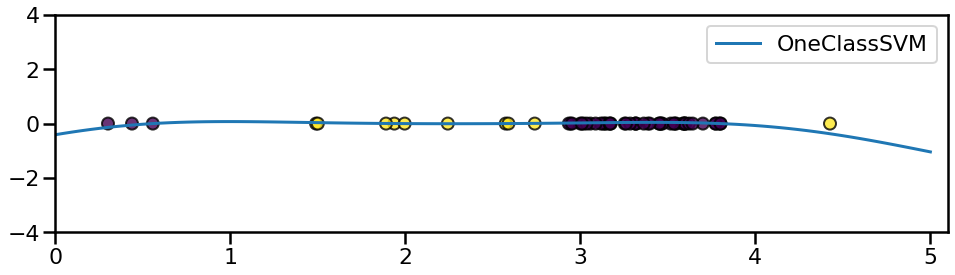

In [16]:

def step_func(region_bound, X):
    return (
        (-1 * (X > region_bound[0] + 0.07))
        + (1 * (X > region_bound[1] - 0.1))
        + (-1 * (X > region_bound[2] + 0.08))
    )


region_bound = [1.4, 2.8, 3.9]
region_bounds = [[1.4, 2.8, 3.9], [0.5, 2.3, 2.7], [1.1, 1.7, 3.8]]
Ma_index = np.where(y == 0)
Ma = np.array([X[i] for i in Ma_index]).ravel()
yi = np.ones(len(Ma))
rbf = interpolate.Rbf(Ma, yi, function="gaussian")
zsvm = model.decision_function(x.reshape(-1, 1))
#model = SVC(kernel=kernel, C=C, gamma=gamma)
#model.fit(X, y)
#weight_model = SVC(
#    kernel=kernel, C=C, gamma=gamma, class_weight="balanced"
#)
#weight_model.fit(X, y)
one_class_model = OneClassSVM(kernel=kernel, gamma=gamma,nu=0.1)
one_class_model.fit(X, y)
#z = rbf(x.reshape(-1, 1)).reshape(100,)
# print(zsvm.shape)
# print(z.shape)
# z = _kernel2(X,y)
# print(z)
zz = z + step_func(region_bound, x).ravel()
# z = km
# print(z)
z = one_class_model.decision_function(x.reshape(-1,1))

tex1 = r'$N_1$'
tex2 = r'$N_2$'
tex3 = r'$f_1(x)$'
tex4 = r'$f_2(x)$'

plt.figure(figsize=(16, 4))
plt.ylim((-4, 4))
plt.xlim((0, 5.1))

plt.scatter(X, np.zeros(len(X)), alpha=0.8, c=y, edgecolor="k")
#plt.text(0.7, -2, tex1 ,)
#plt.text(0.7, 2, tex3 )
#plt.text(3.3 ,-2, tex2 )
#plt.text(3.3 ,2, tex4 )

plt.plot(x, 1 * z, label="OneClassSVM")
#plt.plot(x,zz, label="Corected boundary",color="C1")
plt.legend()
plt.savefig("kotaro_method.png")


pred = np.sign(zz)

# print(pred)
print(y_t)
print(pred)
pred = np.where(pred == 1, 0, 1)
print(pred)
# print(pred)
# pred = model.predict(X_t)
print(accuracy_score(y_t, pred))

(100,)


(array([90., 10.]), array([0. , 0.5, 1. ]), <BarContainer object of 2 artists>)

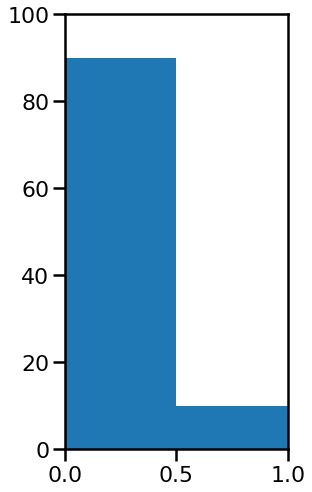

In [12]:
x =   np.ones(10)
x = np.append(x,np.zeros(90))
print(x.shape)
plt.figure(figsize=(4,8))
#plt.tick_params(labelbottom=False)
plt.ylim(0,100)
plt.xlim([0,1])
#plt.xlabel("陰性               陽性 (1 or 0)", fontsize=20,fontname='IPAexGothic')
plt.hist(x,bins=2)


Text(73.18, 0.5, '観測値')

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


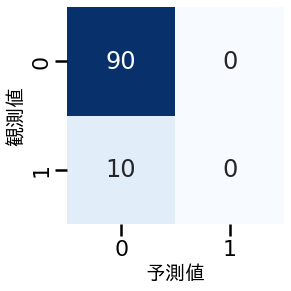

In [13]:
from sklearn.metrics import confusion_matrix
import numpy as np
cm = np.array([[90,0],[10,0]])

sns.heatmap(cm,square=True,cbar=False,annot=True,cmap='Blues')
plt.xlabel("予測値",fontsize=20,fontname='IPAexGothic')
plt.ylabel("観測値",fontsize=20,fontname='IPAexGothic')


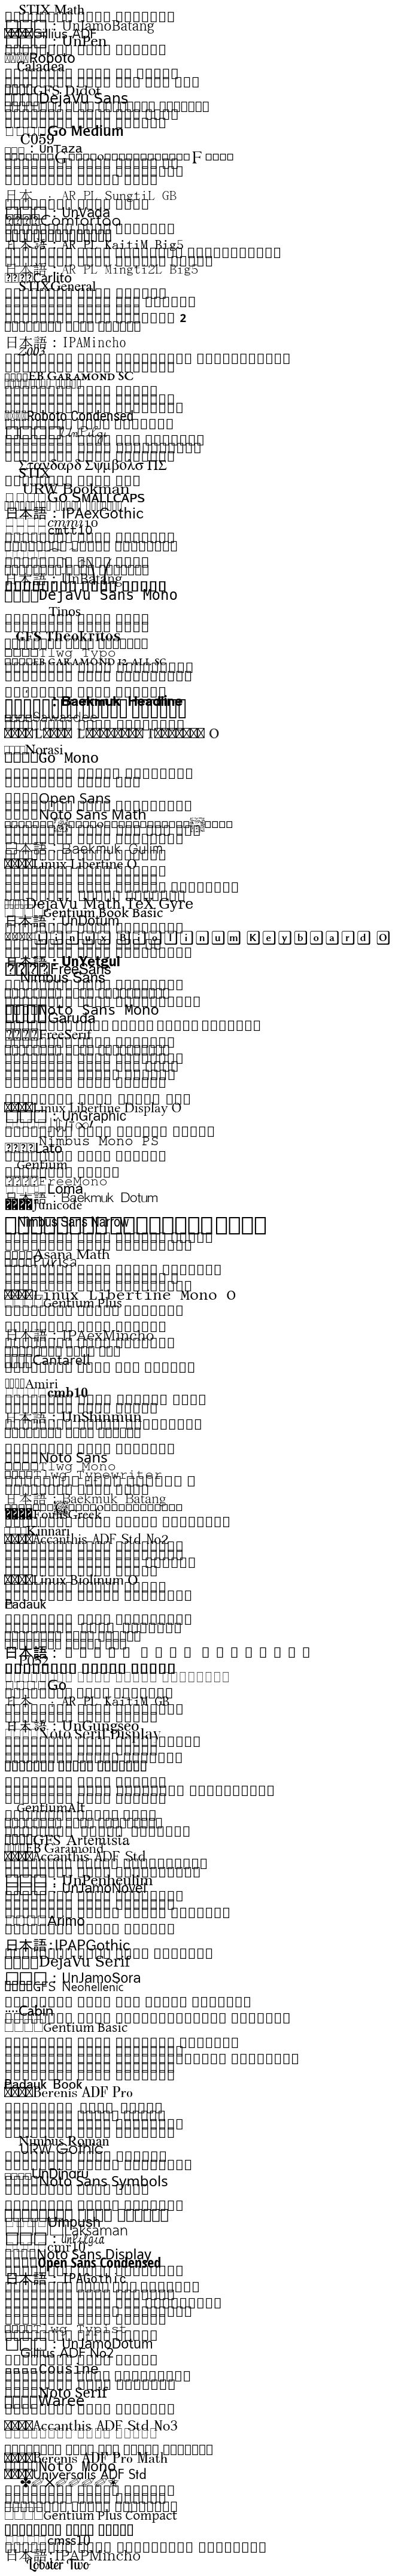

In [15]:
import matplotlib
fonts = set([f.name for f in matplotlib.font_manager.fontManager.ttflist])
 
# 描画領域のサイズ調整
plt.figure(figsize=(10,len(fonts)/4))
 
# フォントの表示
for i, font in enumerate(fonts):
    plt.text(0, i, f"日本語：{font}", fontname=font)
    
# 見やすいように軸を消す
plt.ylim(0, len(fonts))
plt.axis("off")
    
plt.show()

In [19]:
s = 10 * np.random.dirichlet((1,1,1,1,1,1),1)
print(np.sum(s), s)

9.999999999999998 [[1.70807985 1.44476579 2.62467945 2.21633854 0.24896449 1.75717187]]


In [ ]:
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

# 均衡なデータセットの生成
X, y = make_classification(n_samples=1000, n_features=10, weights=[0.5, 0.5], random_state=42)

# リサンプリングの実行
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# 不均衡なデータセットの確認
unique_labels, counts = np.unique(y_resampled, return_counts=True)
print("リサンプリング後のラベルとその数:")
for label, count in zip(unique_labels, counts):
    print(f"ラベル {label}: {count}個")
